In [1]:
import tensorflow as tf

In [3]:
tf.placeholder(tf.float32)

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
np.random.seed(101)
tf.set_random_seed(101)

In [9]:
rand_a = np.random.uniform(0,100,(5,5))

In [10]:
rand_b=np.random.uniform(0,100,(5,1))

In [11]:
a = tf.placeholder(tf.float32)

In [12]:
b = tf.placeholder(tf.float32)

In [13]:
add_op = a + b

In [14]:
mul_op = a * b

In [18]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b: rand_b})
    print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [19]:
n_features = 10
n_dense_neurons = 3

In [20]:
x = tf.placeholder(tf.float32, (None, n_features))

In [22]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [23]:
xW = tf.matmul(x,W)

In [24]:
z=tf.add(xW,b)

In [25]:
a = tf.sigmoid(z)

In [26]:
init = tf.global_variables_initializer()

In [27]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [28]:
print(layer_out)

[[0.90146554 0.64960814 0.95483005]]


In [29]:
##Simple Regression

In [32]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [33]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [34]:
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [35]:
%matplotlib inline

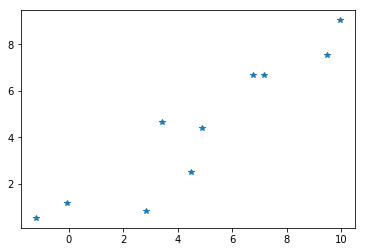

In [38]:
plt.plot(x_data, y_label,'*')

In [40]:
##y = mx + b
np.random.rand(2)

array([0.44236813, 0.87758732])

In [41]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [42]:
error = 0
for x,y in zip(x_data, y_label):
    y_hat = m*x+b
    error += (y - y_hat)**2

In [44]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [45]:
init = tf.global_variables_initializer()

In [47]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 1
    for i in range(training_steps):
        sess.run(train)
    final_slope,final_intercept=sess.run([m,b])

In [ ]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test+final_intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,)